In [19]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from cvxpy import *
from DTools import *
from matplotlib import gridspec
from matplotlib.patches import Rectangle
%matplotlib inline

In [52]:
path =r'../experiment_data2/' # use your path
train_0 = pd.read_csv(path + "train_0.csv",index_col=None, header=0, usecols=range(1,6))
train_1 = pd.read_csv(path + "train_1.csv",index_col=None, header=0, usecols=range(1,6))
train_2 = pd.read_csv(path + "train_2.csv",index_col=None, header=0, usecols=range(1,6))
train_3 = pd.read_csv(path + "train_3.csv",index_col=None, header=0, usecols=range(1,6))
train_4 = pd.read_csv(path + "train_4.csv",index_col=None, header=0, usecols=range(1,6))
test_0 = pd.read_csv(path + "test_0.csv",index_col=None, header=0, usecols=range(1,6))
test_1 = pd.read_csv(path + "test_1.csv",index_col=None, header=0, usecols=range(1,6))
test_2 = pd.read_csv(path + "test_2.csv",index_col=None, header=0, usecols=range(1,6))
test_3 = pd.read_csv(path + "test_3.csv",index_col=None, header=0, usecols=range(1,6))
test_4 = pd.read_csv(path + "test_4.csv",index_col=None, header=0, usecols=range(1,6))
train_new_0 = pd.read_csv(path + "train_new_0.csv",index_col=None, header=0, usecols=range(1,6))
train_new_1 = pd.read_csv(path + "train_new_1.csv",index_col=None, header=0, usecols=range(1,6))
train_new_2 = pd.read_csv(path + "train_new_2.csv",index_col=None, header=0, usecols=range(1,6))
train_new_3 = pd.read_csv(path + "train_new_3.csv",index_col=None, header=0, usecols=range(1,6))
train_new_4 = pd.read_csv(path + "train_new_4.csv",index_col=None, header=0, usecols=range(1,6))
test_new_0 = pd.read_csv(path + "test_new_0.csv",index_col=None, header=0, usecols=range(1,6))
test_new_1 = pd.read_csv(path + "test_new_1.csv",index_col=None, header=0, usecols=range(1,6))
test_new_2 = pd.read_csv(path + "test_new_2.csv",index_col=None, header=0, usecols=range(1,6))
test_new_3 = pd.read_csv(path + "test_new_3.csv",index_col=None, header=0, usecols=range(1,6))
test_new_4 = pd.read_csv(path + "test_new_4.csv",index_col=None, header=0, usecols=range(1,6))
features = ['Age (decade)','Education Years','Income','Gender','Income Binary']
D_features = ['Gender']
Y_features = ['Income Binary']
X_features = ['Age (decade)', 'Education Years']

TrainList=[train_0,train_1,train_2,train_3,train_4]
TestList=[test_0,test_1,test_2,test_3,test_4]
TrainNewList=[train_new_0,train_new_1,train_new_2,train_new_3,train_new_4]
TestNewList=[test_new_0,test_new_1,test_new_2,test_new_3,test_new_4]

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, auc, classification_report

In [54]:
def RunLRClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features):
    LRModelsAUC=[]
    LRTestPreds=[]
    for i in range(0,len(TrainNewList)):
        dft = pd.get_dummies(TrainNewList[i][D_features+X_features])
        lr=LogisticRegression()
        lr.fit(dft,TrainNewList[i][Y_features])
        dft = pd.get_dummies(TestNewList[i][D_features+X_features])
        proba=lr.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        LRModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        LRTestPreds.append(dft)
    return LRModelsAUC,LRTestPreds

def RunLRWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features):
    LRModelsAUC=[]
    LRTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][X_features])
        lr=LogisticRegression()
        lr.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][X_features])
        proba=lr.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        LRModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        LRTestPreds.append(dft)
    return LRModelsAUC,LRTestPreds

def RunPlainLRClassifier(TrainList,TestList,D_features,X_features,Y_features):
    LRModelsAUC=[]
    LRTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][D_features+X_features])
        lr=LogisticRegression()
        lr.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][D_features+X_features])
        proba=lr.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        LRModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        LRTestPreds.append(dft)
    return LRModelsAUC,LRTestPreds

def RunRFClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features):
    RFModelsAUC=[]
    RFTestPreds=[]
    for i in range(0,len(TrainNewList)):
        dft = pd.get_dummies(TrainNewList[i][D_features+X_features])
        #rf=RandomForestClassifier(n_estimators=30) # gives better AUC higher discrim
        rf=RandomForestClassifier(max_depth=None, max_leaf_nodes=6, max_features=3) # gives slightly lesser AUC 
                                                                                    #and lower discrim
        rf.fit(dft,TrainNewList[i][Y_features])
        dft = pd.get_dummies(TestNewList[i][D_features+X_features])
        proba=rf.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        RFModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        RFTestPreds.append(dft)
    return RFModelsAUC,RFTestPreds

def RunRFWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features):
    RFModelsAUC=[]
    RFTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][X_features])
        #rf=RandomForestClassifier(n_estimators=30)
        rf=RandomForestClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
        rf.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][X_features])
        proba=rf.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        RFModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        RFTestPreds.append(dft)
    return RFModelsAUC,RFTestPreds

def RunPlainRFClassifier(TrainList,TestList,D_features,X_features,Y_features):
    RFModelsAUC=[]
    RFTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][D_features+X_features])
        rf=RandomForestClassifier() # adding options here beats zemel in terms of discrim
                                    #so I removed them to be consisent with the compass plot
        rf.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][D_features+X_features])
        proba=rf.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        RFModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        RFTestPreds.append(dft)
    return RFModelsAUC,RFTestPreds


def RunNBClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features):
    NBModelsAUC=[]
    NBTestPreds=[]
    for i in range(0,len(TrainNewList)):
        dft = pd.get_dummies(TrainNewList[i][D_features+X_features])
        nb=MultinomialNB()
        nb.fit(dft,TrainNewList[i][Y_features])
        dft = pd.get_dummies(TestNewList[i][D_features+X_features])
        proba=nb.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        NBModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        NBTestPreds.append(dft)
    return NBModelsAUC,NBTestPreds

def RunNBWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features):
    NBModelsAUC=[]
    NBTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][X_features])
        nb=MultinomialNB()
        nb.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][X_features])
        proba=nb.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        NBModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        NBTestPreds.append(dft)
    return NBModelsAUC,NBTestPreds

def RunPlainNBClassifier(TrainList,TestList,D_features,X_features,Y_features):
    NBModelsAUC=[]
    NBTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][D_features+X_features])
        nb=MultinomialNB()
        nb.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][D_features+X_features])
        proba=nb.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        NBModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        NBTestPreds.append(dft)
    return NBModelsAUC,NBTestPreds


def RunSVClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features):
    SVModelsAUC=[]
    SVTestPreds=[]
    for i in range(0,len(TrainNewList)):
        dft = pd.get_dummies(TrainNewList[i][D_features+X_features])
        svc=SVC(probability=True, random_state=0, C=1.0)
        svc.fit(dft,TrainNewList[i][Y_features])
        dft = pd.get_dummies(TestNewList[i][D_features+X_features])
        proba=svc.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        SVModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        SVTestPreds.append(dft)
    return SVModelsAUC,SVTestPreds

def RunSVWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features):
    SVModelsAUC=[]
    SVTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][X_features])
        svc = SVC(kernel='linear',probability=True)
        svc.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][X_features])
        proba=svc.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        SVModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        SVTestPreds.append(dft)
    return SVModelsAUC,SVTestPreds

def RunPlainSVClassifier(TrainList,TestList,D_features,X_features,Y_features):
    SVModelsAUC=[]
    SVTestPreds=[]
    for i in range(0,len(TrainList)): 
        dft = pd.get_dummies(TrainList[i][D_features+X_features])
        svc = SVC(kernel='linear',probability=True)
        svc.fit(dft,TrainList[i][Y_features])
        dft = pd.get_dummies(TestList[i][D_features+X_features])
        proba=svc.predict_proba(dft)
        ytrue=TestList[i][Y_features]
        testauc=roc_auc_score(ytrue, proba[:, 1])
        SVModelsAUC.append(testauc)
        dft=TestList[i][D_features+X_features+Y_features]
        dft['pred']=proba[:,1]
        SVTestPreds.append(dft)
    return SVModelsAUC,SVTestPreds

def ComputeDiscrimination(LRTestPreds,D_features):
    test_disc=[]
    for i in range(0,len(LRTestPreds)):
        mean = LRTestPreds[i].groupby(D_features)['pred'].mean()
        v = mean.values
        v = v.reshape(len(v),1)
        ratio_df = pd.DataFrame(v/v.transpose(),index=mean.index,columns=mean.index )
        ratio_df_arr=np.asarray(np.abs(1-ratio_df))
        maxdisc=np.amax(ratio_df_arr)
        test_disc.append(maxdisc)   
    return test_disc

In [57]:
#LRres=RunLRClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features)
#LRres=RunPlainLRClassifier(TrainList,TestList,D_features,X_features,Y_features)
#LRres=RunLRWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features)
#LRDisc=ComputeDiscrimination(LRres[1],D_features)

#RFres=RunRFClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features)
#RFres=RunPlainRFClassifier(TrainList,TestList,D_features,X_features,Y_features)
RFres=RunRFWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features)
RFDisc=ComputeDiscrimination(RFres[1],D_features)

#NBres=RunNBClassifier(TrainList,TestList,TrainNewList,TestNewList,D_features,X_features,Y_features)
#NBres=RunPlainNBClassifier(TrainList,TestList,D_features,X_features,Y_features)
#NBres=RunNBWithoutDClassifier(TrainList,TestList,D_features,X_features,Y_features)
#NBDisc=ComputeDiscrimination(NBres[1],D_features)

/home/bhanu/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:78: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


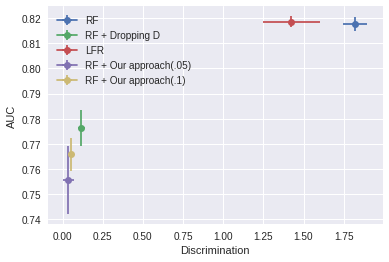

In [60]:
from scipy.stats import t
RFAUC4=np.asarray(RFres[0])
RF_mean4 = np.mean(RFAUC4)

zemelauc=np.asarray([0.821,0.819,0.815751050257])
zemel_mean=np.mean(zemelauc)

# standard deviation
RF_std4 = np.std(RFAUC4)
zemel_std=np.std(zemelauc)

RFDisc4=np.asarray(RFDisc)
RFdisc_mean4 = np.mean(RFDisc4)
RFdisc_std4=np.std(RFDisc4)

zemel_disc=np.asarray([1.331,1.67,1.2742166099857646])
zemel_disc_mean=np.mean(zemel_disc)
zemel_disc_std=np.std(zemel_disc)

# standard error
#RF_se1 = RF_std1 / np.sqrt(RFAUC1.size)

#zemel_se=zemel_std/np.sqrt(zemelauc.size)

#zemel_antidiscrim=0
#zemelaccuracyvals=np.asarray([0.76,0.78])
#zemel_mean=np.mean(zemelaccuracyvals)
#zemel_std=np.std(zemelaccuracyvals)

#dof = RFAUC2.size - 1         # degrees of freedom
#dof=zemelauc.size-1
alpha = 1.0 - 0.95
#conf_interval = t.ppf(1-alpha/2., dof) * NB_std4*np.sqrt(1.+1./NBAUC4.size)
#conf_interval = t.ppf(1-alpha/2., dof) * zemel_std*np.sqrt(1.+1./zemelauc.size)

fig = plt.gca()
font_options={'family' : 'sans-serif'}
plt.rc('font', **font_options)

plt.errorbar(RFdisc_mean2, RF_mean2, xerr=RFdisc_std2, yerr=RF_std2, fmt='-o') #LR
plt.errorbar(RFdisc_mean4, RF_mean4, xerr=RFdisc_std4, yerr=RF_std4, fmt='-o') # LR + Dropping D
plt.errorbar(zemel_disc_mean, zemel_mean, xerr=zemel_disc_std, yerr=zemel_std, fmt='-o') # Zemel
plt.errorbar(RFdisc_mean1, RF_mean1, xerr=RFdisc_std1, yerr=RF_std1, fmt='-o') # LR + 0.05 (eps)
plt.errorbar(RFdisc_mean3, RF_mean3, xerr=RFdisc_std3, yerr=RF_std3, fmt='-o') # LR + 0.1 (eps)

#fig.axes.get_xaxis().set_visible(False)
fig.spines["top"].set_visible(False)  
fig.spines["right"].set_visible(False)  
plt.tick_params(axis="both", which="both", bottom="off", top="off",  
                labelbottom="on", left="on", right="off", labelleft="on")  

plt.legend(['RF','RF + Dropping D','LFR','RF + Our approach(.05)','RF + Our approach(.1)'], 
           loc='best',fancybox=True)

plt.ylabel('AUC')
plt.xlabel('Discrimination')

#plt.show()

plt.savefig('nips_plots/aucvsdiscRF_new.png',dpi=400,bbox_inches='tight')